In [1]:
#Initialising
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('/content/superstore.csv')
print("="*50)
print("DATASET OVERVIEW")
print("="*50,'\n')
print(f"Dataset shape: {df.shape}",)
print("-"*30,"\n")
print("Dataset Info:")
print("-"*30)
print(df.info())
print("\nMissing values:")
print("-"*30)
print(df.isnull().sum())
print("="*50,'\n')


DATASET OVERVIEW

Dataset shape: (51290, 27)
------------------------------ 

Dataset Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15

In [2]:
#Q1

print("="*50)
print("Q1: DATA CLEANING")
print("="*50,'\n')

df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship.Date'])

df['Shipping.Cost'] = df["Shipping.Cost"].fillna(df['Shipping.Cost'].median())
df['State'] = df['State'].fillna(df['State'].mode()[0])
print("Null values filled")
print("-"*30)

df=df.drop('记录数', axis=1 )
print("Additional columns removed")
print("-"*30)

duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
print("Duplicates dropped")
print("-"*30)

print("Description")
print("-"*30)
print(df.dtypes)
print(df.describe())


print(df.isnull().sum())
print("="*50,'\n')

Q1: DATA CLEANING

Null values filled
------------------------------
Additional columns removed
------------------------------
Duplicates dropped
------------------------------
Description
------------------------------
Category                  object
City                      object
Country                   object
Customer.ID               object
Customer.Name             object
Discount                 float64
Market                    object
Order.Date        datetime64[ns]
Order.ID                  object
Order.Priority            object
Product.ID                object
Product.Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row.ID                     int64
Sales                      int64
Segment                   object
Ship.Date                 object
Ship.Mode                 object
Shipping.Cost            float64
State                     object
Sub.Category              object
Year                 

Q2: UNIVARIATE ANALYSIS - CATEGORICAL FEATURES



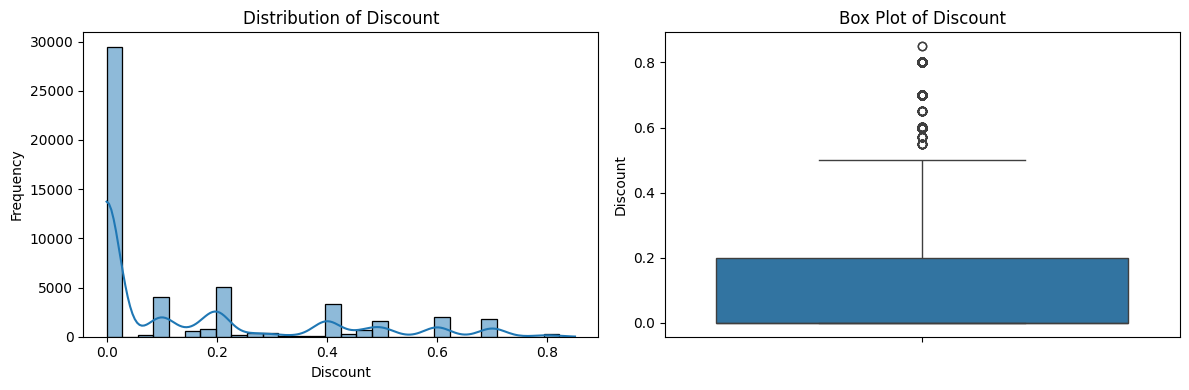

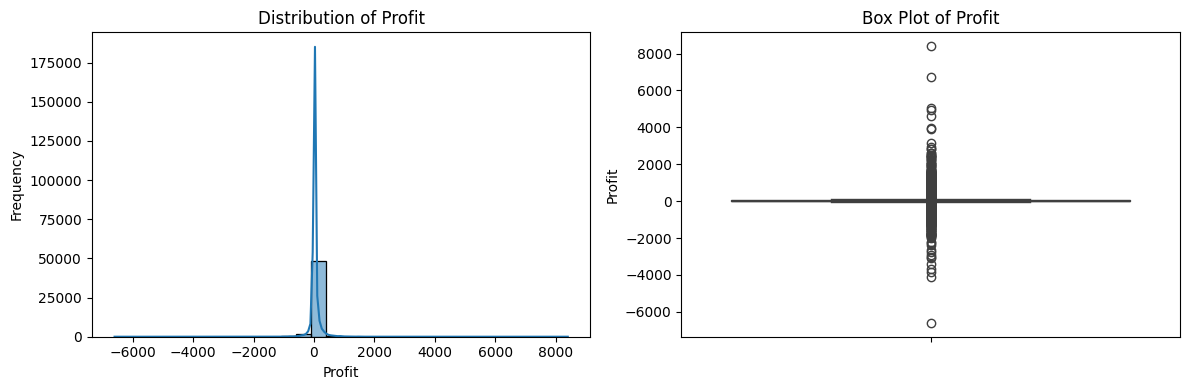

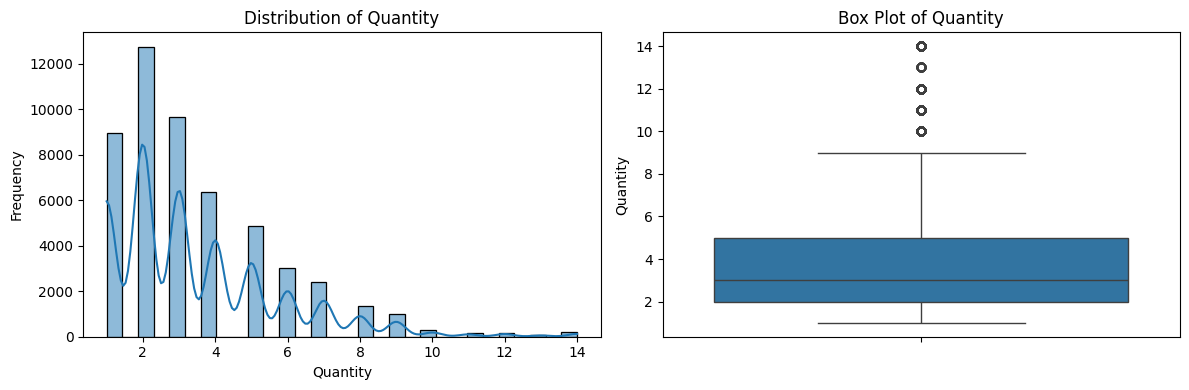

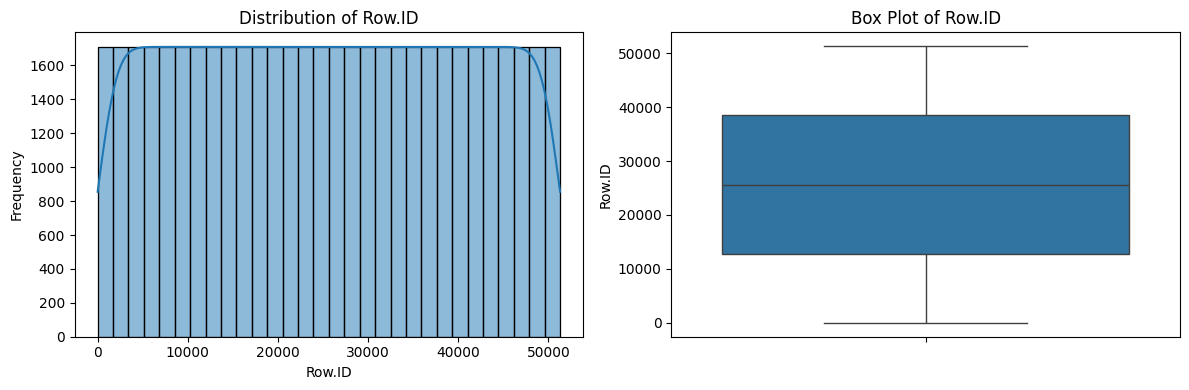

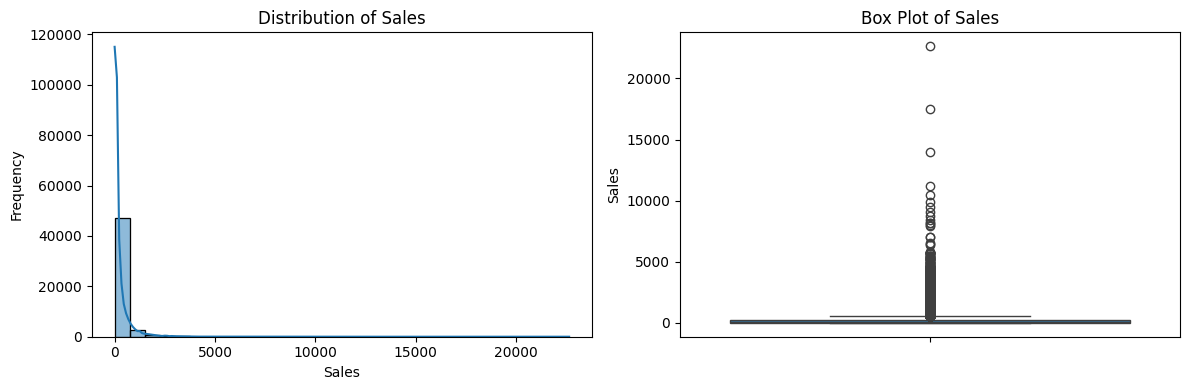

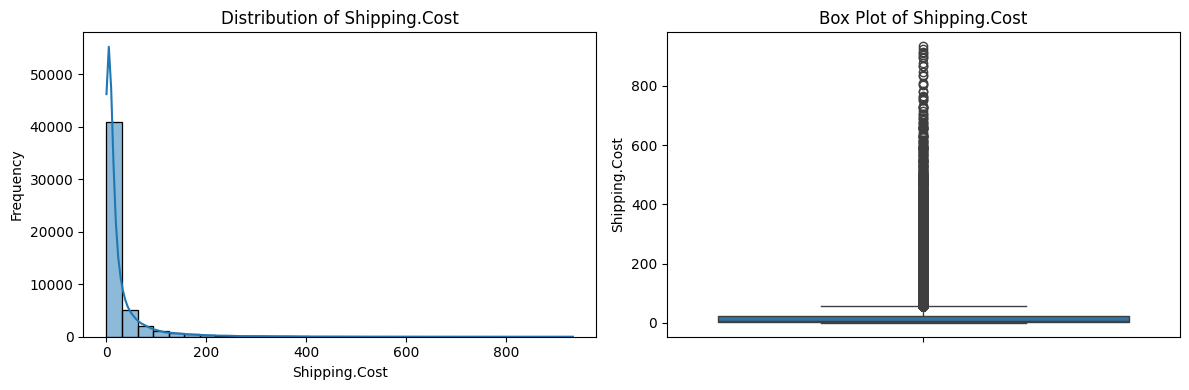

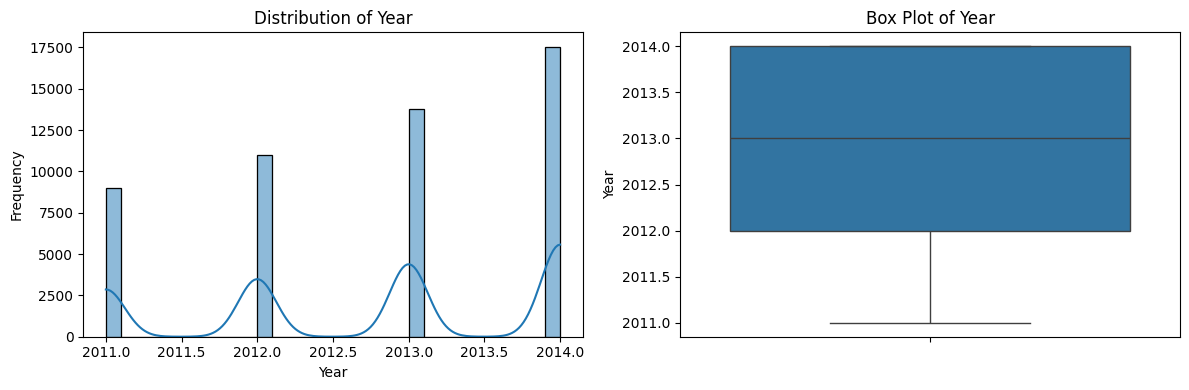

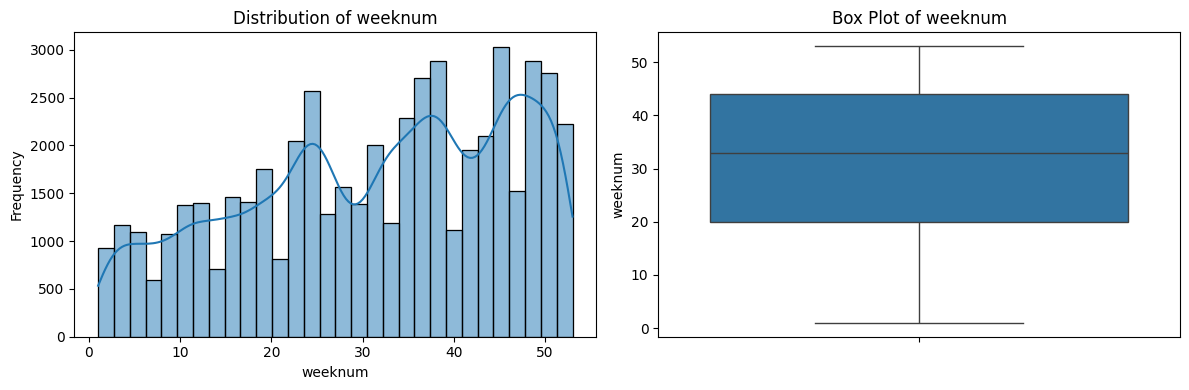


Q2 i:Analyzing features with near-zero variance or constant values...
  Row.ID: High cardinality - May be less informative
  Year: Very low relative variation (CV=0.000546) - Values are very similar

Q2 ii: Which features are uniformly or normally distributed?

Discount:
  - Not clearly uniform or normal

Profit:
  - Not clearly uniform or normal

Quantity:
  - Not clearly uniform or normal

Row.ID:
  - Looks roughly uniform 

Sales:
  - Not clearly uniform or normal

Shipping.Cost:
  - Not clearly uniform or normal

Year:
  - Looks roughly normal (mean=2012.8, median=2013.0)

weeknum:
  - Looks roughly normal (mean=31.3, median=33.0)

Q2 iii: Which features are right-skewed/left-skewed?
Discount: Right-skewed (skewness=1.39) (Most values are low with few high values)
Profit: Right-skewed (skewness=4.16) (Most values are low with few high values)
Quantity: Right-skewed (skewness=1.36) (Most values are low with few high values)
Row.ID: Approximately symmetric (skewness=0.00) (Values ar

In [3]:
#Q2

print("="*50)
print("Q2: UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("="*50,'\n')

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

print("\nQ2 i:Analyzing features with near-zero variance or constant values...")
for col in numerical_cols:

    variance = df[col].var()
    std_dev = df[col].std()
    mean_val = df[col].mean()


    if mean_val != 0:
        cv = std_dev / abs(mean_val)
    else:
        cv = np.inf


    if variance < 0.01:
        print(f"  {col}: Low variance (var={variance:.6f}) - May be less useful")
    elif cv < 0.01:
        print(f"  {col}: Very low relative variation (CV={cv:.6f}) - Values are very similar")
    else:
        unique_ratio = df[col].nunique() / len(df)
        if unique_ratio > 0.9:
            print(f"  {col}: High cardinality - May be less informative")

print("\nQ2 ii: Which features are uniformly or normally distributed?")

for col in numerical_cols:
    print(f"\n{col}:")


    value_counts, bins = np.histogram(df[col], bins=10)
    heights = value_counts / len(df[col])


    height_ratio = heights.max() / heights.min() if heights.min() > 0 else np.inf

    if height_ratio < 2:
        print(f"  - Looks roughly uniform ")
    else:

        mean = df[col].mean()
        median = df[col].median()

        if abs(mean - median) / mean < 0.1:
            print(f"  - Looks roughly normal (mean={mean:.1f}, median={median:.1f})")
        else:
            print(f"  - Not clearly uniform or normal")

print("\nQ2 iii: Which features are right-skewed/left-skewed?")
for col in numerical_cols:
    skewness = df[col].skew()

    if skewness > 0.5:
        print(f"{col}: Right-skewed (skewness={skewness:.2f}) (Most values are low with few high values)")
    elif skewness < -0.5:
        print(f"{col}: Left-skewed (skewness={skewness:.2f}) (Most values are high with few low values)")
    else:
        print(f"{col}: Approximately symmetric (skewness={skewness:.2f}) (Values are balanced around the center)")

print("\nQ2 iv: Which features have high outliers?")
for col in numerical_cols:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1


    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    num_outliers = len(outliers)

    if num_outliers > 0:
        percentage = (num_outliers / len(df)) * 100
        print(f"{col}: {num_outliers} outliers ({percentage:.1f}% of data)")

        if percentage > 5:
            print(f"  Impact: High ")
        elif percentage > 1:
            print(f"  Impact: Medium ")
        else:
            print(f"  Impact: Low ")


        if num_outliers <= 5:
            print(f"  Outlier values: {outliers.values}")
    else:
        print(f"{col}: No outliers detected")
print("="*50,'\n')

In [4]:
#Q3

print("="*50)
print("Q3: UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("="*50,'\n')


print("\nQ3 i: Inaccurate Categorical Features")
print("Features like 'Row ID', 'Order ID' and 'Product ID' are identifiers, not useful categorical insights.")
print("Features with too many unique values (like Customer Name, Product Name) may not be useful directly.")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Features: {categorical_cols}")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} unique values")

print("\nQ3 ii: Issue with Customer Name as Categorical")
print("Too many unique values, Might not generalize well.")

print("\nQ3 iii: Category Distribution")
if 'Category' in df.columns:
    category_dist = df['Category'].value_counts()
    print(f"Category distribution: {dict(category_dist)}")
    balance_ratio = category_dist.min() / category_dist.max()
    if balance_ratio > 0.7:
        print("Categories are relatively balanced (ratio > 0.7)")
    else:
        print(f"Categories are skewed (ratio = {balance_ratio:.2f})")

print("\nQ3 iv: Country Dominance")
country_dist = df['Country'].value_counts(normalize=True)
print(f"Top country proportion: {country_dist.iloc[0]:.1%}")
if country_dist.iloc[0] > 0.8:
    print("Implication: Strong geographic bias - model may not generalize to other countries")
else:
    print("Implication: Geographic diversity is present")

print("\nQ3 v: City Concentration")
if 'City' in df.columns:
    city_counts = df['City'].nunique()
    total_entries = len(df)
    print(f"Unique cities: {city_counts} out of {total_entries} entries")
    top_5_cities = df['City'].value_counts(normalize=True).head(5).sum()
    print(f"Top 5 cities concentration: {top_5_cities:.1%}")
    if top_5_cities > 0.5:
        print("Dataset is concentrated in few major cities")
    else:
        print("Dataset is spread across many cities")
print("="*50, '\n')

Q3: UNIVARIATE ANALYSIS - CATEGORICAL FEATURES


Q3 i: Inaccurate Categorical Features
Features like 'Row ID', 'Order ID' and 'Product ID' are identifiers, not useful categorical insights.
Features with too many unique values (like Customer Name, Product Name) may not be useful directly.

Categorical Features: ['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Market', 'Order.ID', 'Order.Priority', 'Product.ID', 'Product.Name', 'Region', 'Segment', 'Ship.Date', 'Ship.Mode', 'State', 'Sub.Category', 'Market2']
  Category: 3 unique values
  City: 3636 unique values
  Country: 147 unique values
  Customer.ID: 4873 unique values
  Customer.Name: 795 unique values
  Market: 7 unique values
  Order.ID: 25035 unique values
  Order.Priority: 4 unique values
  Product.ID: 10292 unique values
  Product.Name: 3788 unique values
  Region: 13 unique values
  Segment: 3 unique values
  Ship.Date: 1 unique values
  Ship.Mode: 4 unique values
  State: 1094 unique values
  Sub.Category: 1

Q4: BIVARIATE ANALYSIS - NUMERICAL TO NUMERICAL


Correlation Matrix:
               Discount    Profit  Quantity    Row.ID     Sales  \
Discount       1.000000 -0.316490 -0.019875  0.087594 -0.086728   
Profit        -0.316490  1.000000  0.104365 -0.019037  0.484923   
Quantity      -0.019875  0.104365  1.000000 -0.173483  0.313580   
Row.ID         0.087594 -0.019037 -0.173483  1.000000 -0.043888   
Sales         -0.086728  0.484923  0.313580 -0.043888  1.000000   
Shipping.Cost -0.079061  0.354441  0.272645 -0.039069  0.768074   
Year          -0.005894  0.002626 -0.005049 -0.000921 -0.002902   
weeknum       -0.000217 -0.000182  0.020839 -0.028776  0.001947   

               Shipping.Cost      Year   weeknum  
Discount           -0.079061 -0.005894 -0.000217  
Profit              0.354441  0.002626 -0.000182  
Quantity            0.272645 -0.005049  0.020839  
Row.ID             -0.039069 -0.000921 -0.028776  
Sales               0.768074 -0.002902  0.001947  
Shipping.Cost       

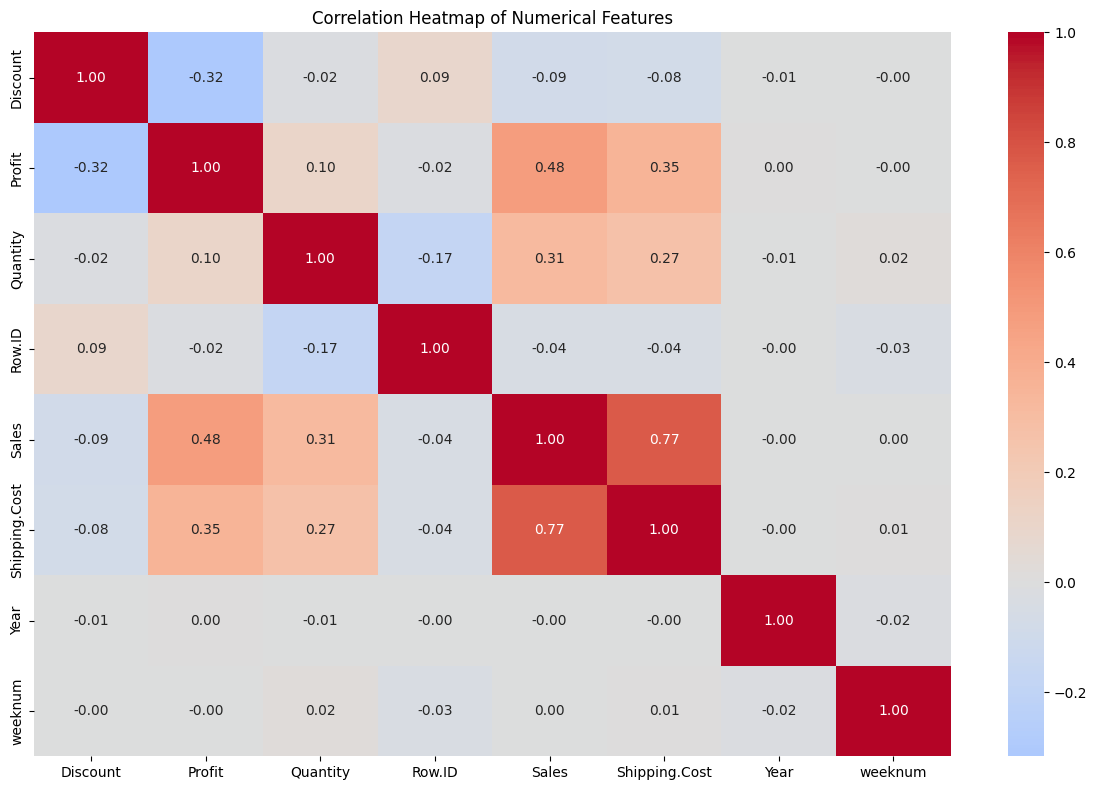


Q4 i: Most Strongly Correlated Features
  Sales - Shipping.Cost: 0.768
  Shipping.Cost - Sales: 0.768
  Profit - Sales: 0.485

Q4 ii: Negatively Correlated Features
  Profit - weeknum: -0.000
  weeknum - Profit: -0.000
  Discount - weeknum: -0.000

Q4 iii: Bivariate Checks for Profit Understanding
Features most correlated with Profit:
Sales            0.484923
Shipping.Cost    0.354441
Quantity         0.104365
Year             0.002626
weeknum         -0.000182
Name: Profit, dtype: float64


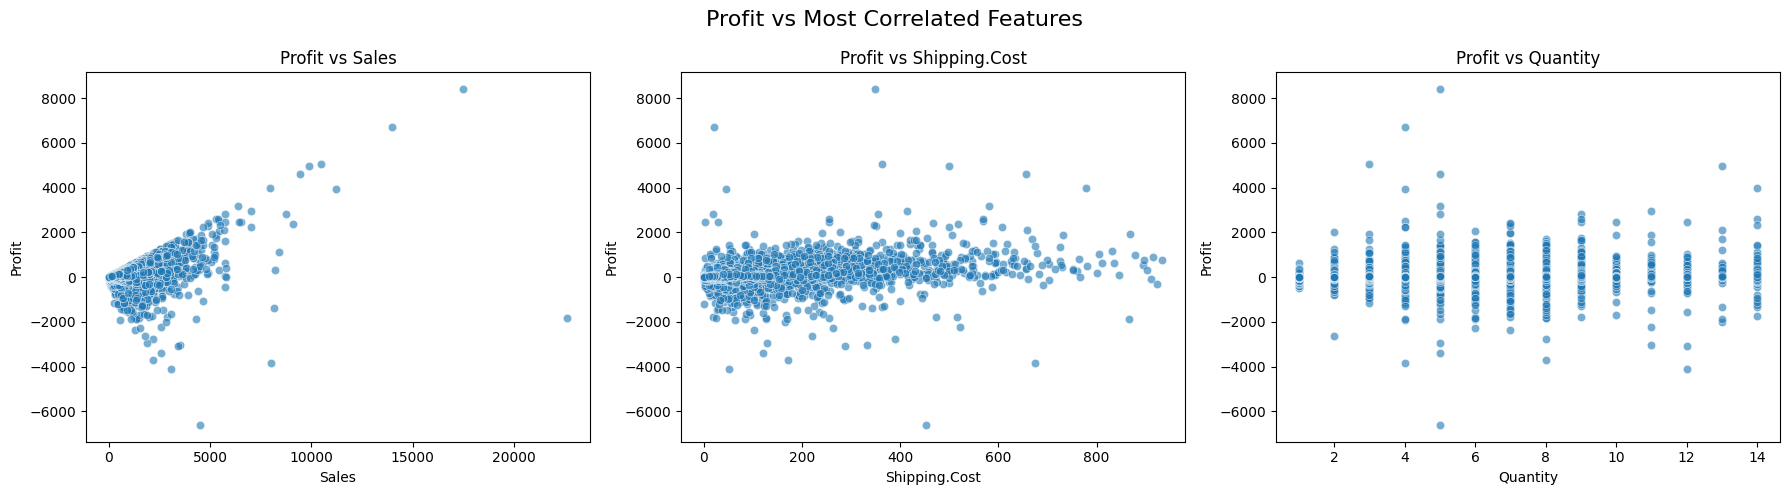


Q4 iv: Time Effects Clues

1. Profit by Year:
Average Profit per Year:
Year
2011    27.666238
2012    28.043722
2013    29.490197
2014    28.758540
Name: Profit, dtype: float64


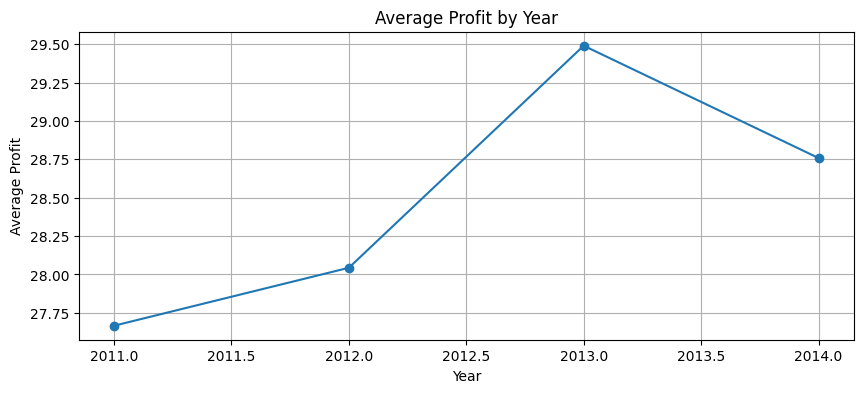

Profit increased by $1.09 over time

2. Profit by Week Number:


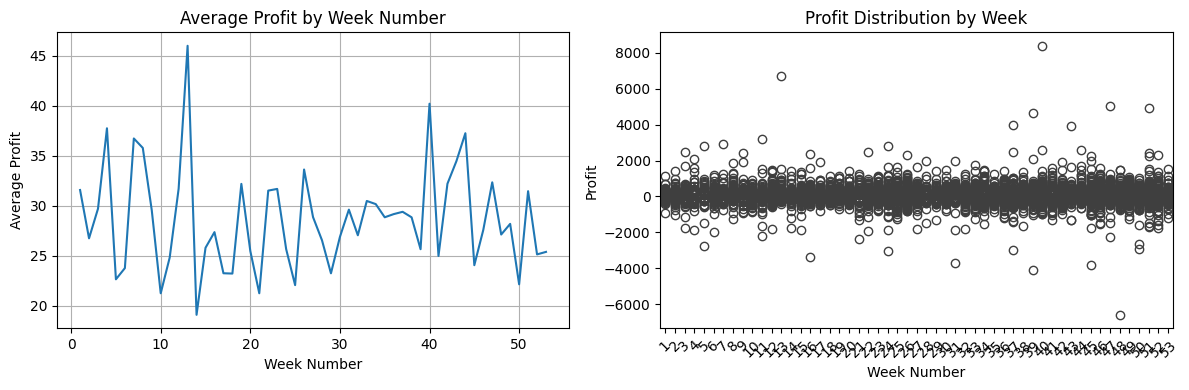

Best week for profit: Week 13 ($46.02)
Worst week for profit: Week 14 ($19.12)

Correlation with Profit:
Year correlation: 0.003
Weeknum correlation: -0.000



In [7]:
#Q4

print("="*50)
print("Q4: BIVARIATE ANALYSIS - NUMERICAL TO NUMERICAL")
print("="*50, '\n')

correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 0.999]

print("\nQ4 i: Most Strongly Correlated Features")

top_positive = corr_pairs.head(3)
for idx, (pair, value) in enumerate(top_positive.items()):
    print(f"  {pair[0]} - {pair[1]}: {value:.3f}")

print("\nQ4 ii: Negatively Correlated Features")

negative_corr = corr_pairs[corr_pairs < 0]
if len(negative_corr) > 0:
    top_negative = negative_corr.head(3)
    for idx, (pair, value) in enumerate(top_negative.items()):
        print(f"  {pair[0]} - {pair[1]}: {value:.3f}")
else:
    print("No strong negative correlations found")

print("\nQ4 iii: Bivariate Checks for Profit Understanding")

profit_corr = correlation_matrix['Profit'].drop('Profit').sort_values(ascending=False)
print("Features most correlated with Profit:")
print(profit_corr.head(5))

top_profit_corr = profit_corr.head(3).index
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Profit vs Most Correlated Features', fontsize=16)

for idx, feature in enumerate(top_profit_corr):
    sns.scatterplot(data=df, x=feature, y='Profit', ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f'Profit vs {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Profit')

plt.tight_layout()
plt.show()


print("\nQ4 iv: Time Effects Clues")

print("\n1. Profit by Year:")

profit_by_year = df.groupby('Year')['Profit'].mean()
print(f"Average Profit per Year:\n{profit_by_year}")


plt.figure(figsize=(10, 4))
profit_by_year.plot(kind='line', marker='o')
plt.title('Average Profit by Year')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.grid(True)
plt.show()


if len(profit_by_year) > 1:
    profit_change = profit_by_year.iloc[-1] - profit_by_year.iloc[0]
    if profit_change > 0:
      print(f"Profit increased by ${profit_change:.2f} over time")
    else:
      print(f"Profit decreased by ${abs(profit_change):.2f} over time")

print("\n2. Profit by Week Number:")

profit_by_week = df.groupby('weeknum')['Profit'].mean()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
profit_by_week.plot(kind='line')
plt.title('Average Profit by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Average Profit')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='weeknum', y='Profit')
plt.title('Profit Distribution by Week')
plt.xlabel('Week Number')
plt.ylabel('Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

best_week = profit_by_week.idxmax()
worst_week = profit_by_week.idxmin()
print(f"Best week for profit: Week {best_week} (${profit_by_week.max():.2f})")
print(f"Worst week for profit: Week {worst_week} (${profit_by_week.min():.2f})")

year_corr = df['Year'].corr(df['Profit'])
week_corr = df['weeknum'].corr(df['Profit'])

print(f"\nCorrelation with Profit:")
print(f"Year correlation: {year_corr:.3f}")
print(f"Weeknum correlation: {week_corr:.3f}")

if abs(year_corr) > 0.3:
    print("Year has noticeable relationship with Profit")
if abs(week_corr) > 0.3:
    print("Week number has noticeable relationship with Profit")

print("="*50, '\n')

Q5: BIVARIATE ANALYSIS - CATEGORICAL TO NUMERICAL


--- Analysis by Category ---


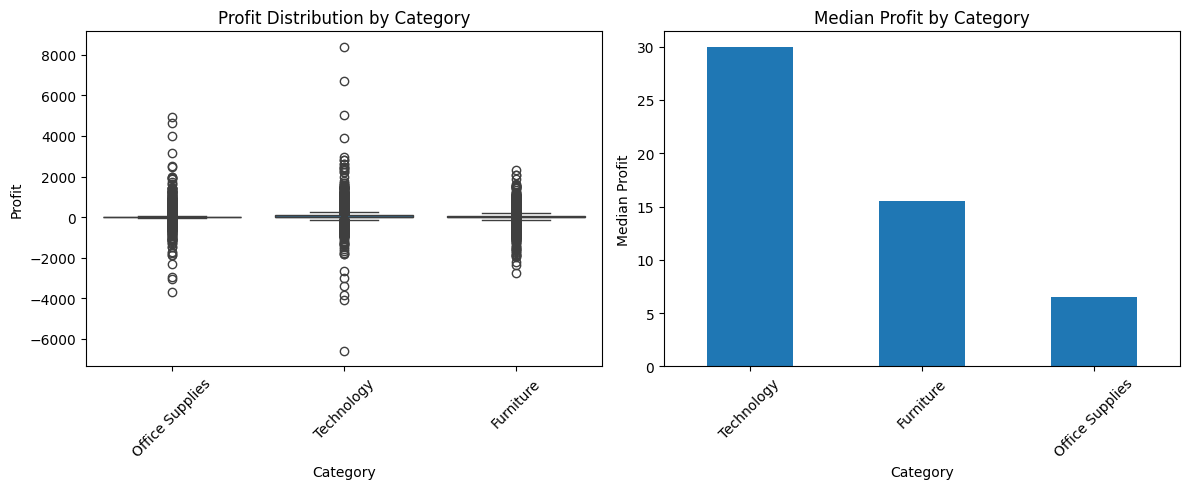

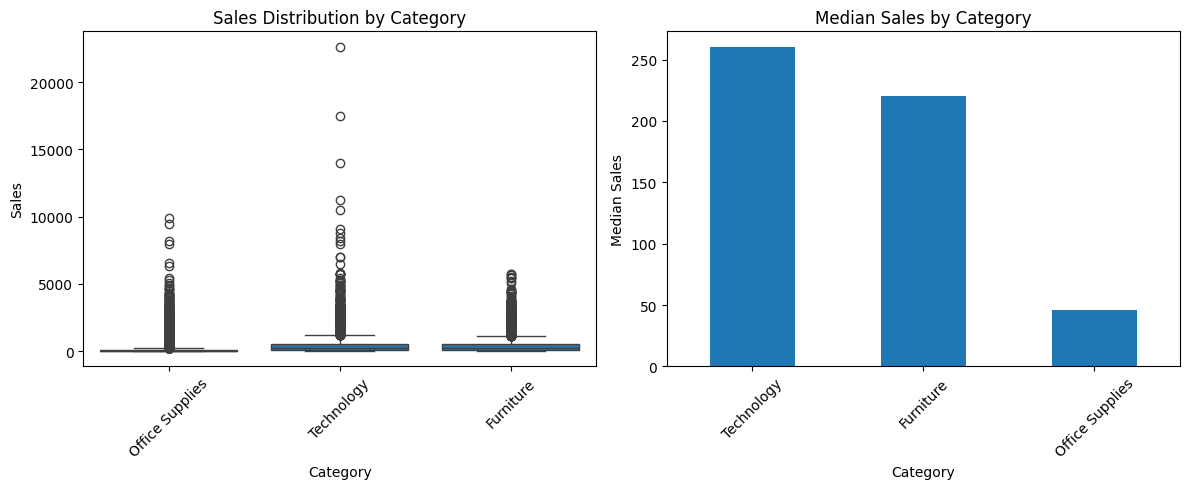


--- Analysis by Segment ---


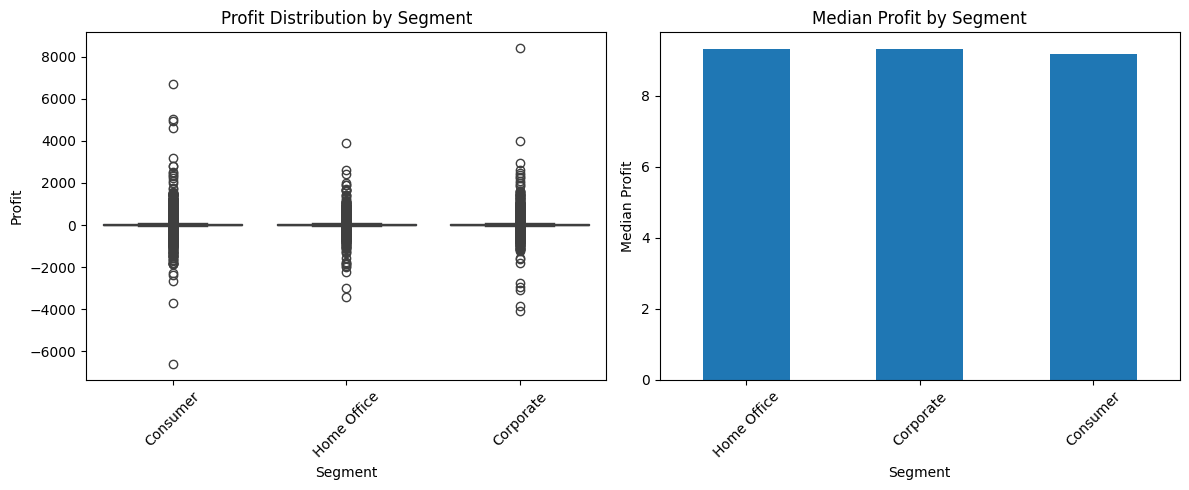

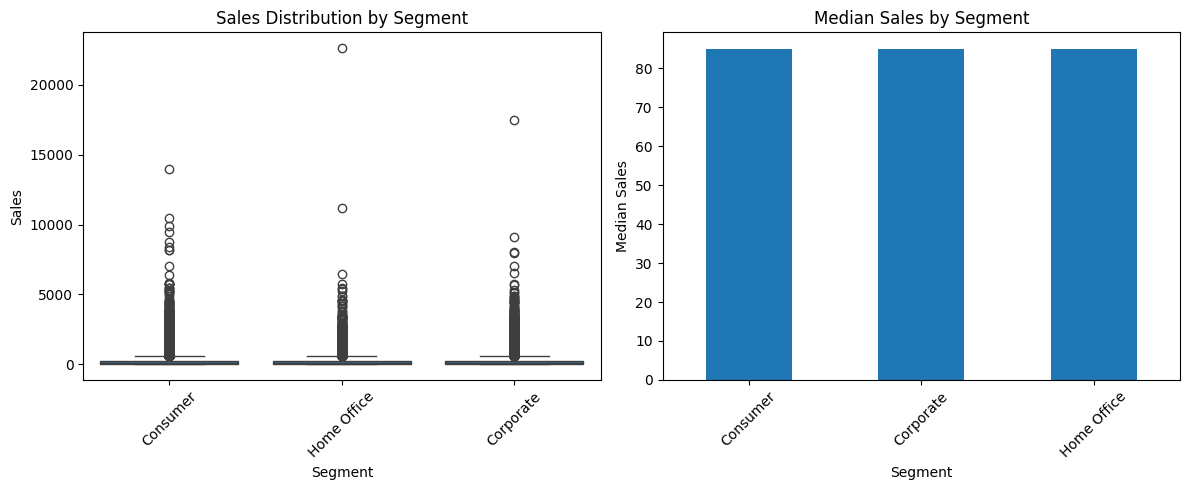


--- Analysis by Region ---


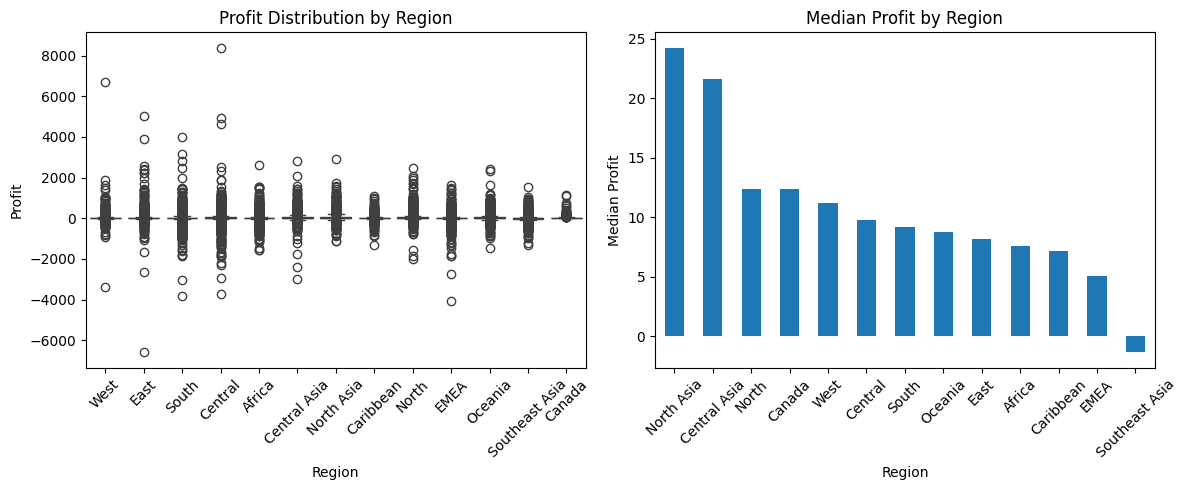

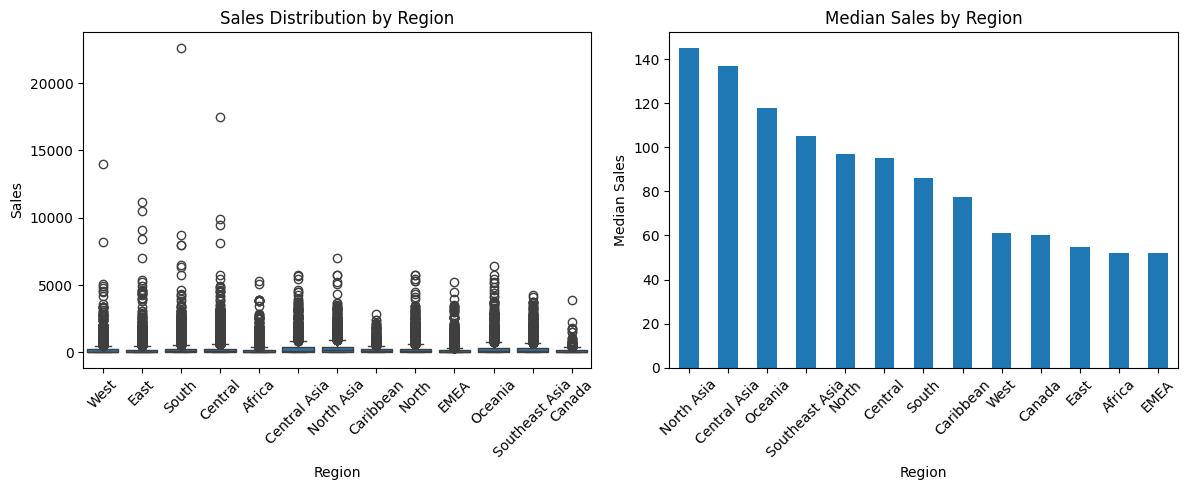


--- Analysis by Ship.Mode ---


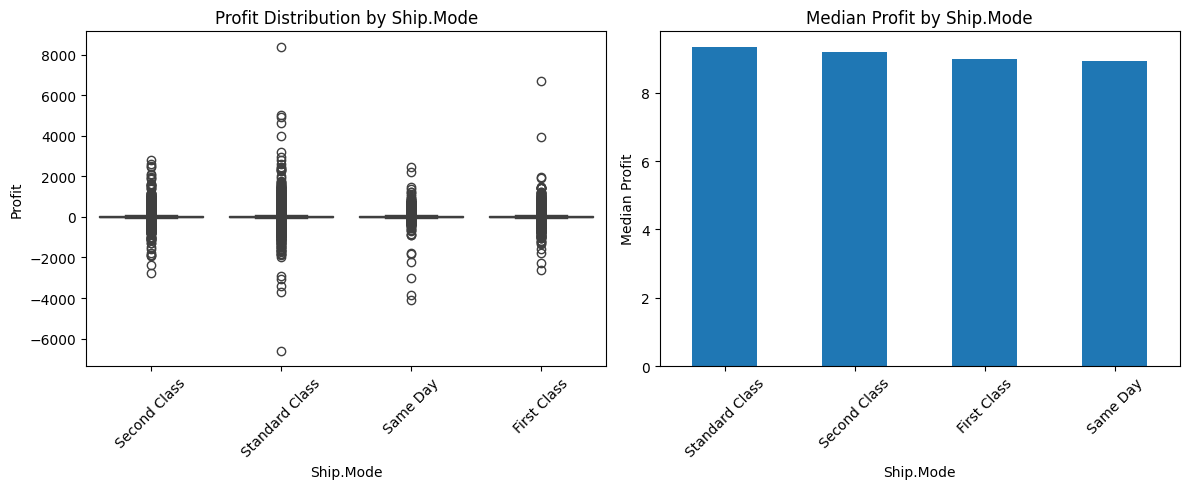

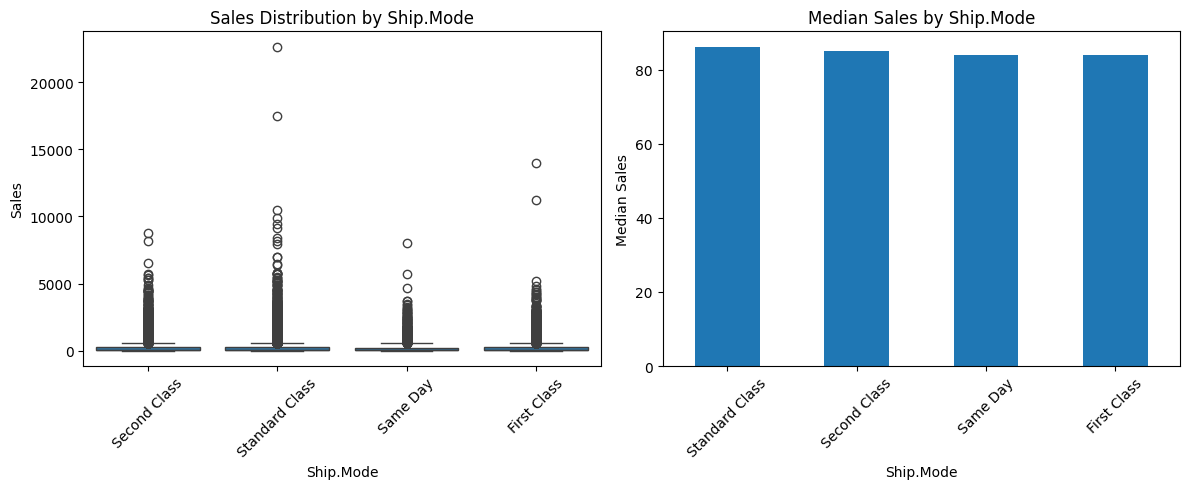


Q5 i: Profit by Category
Highest median profit: Technology ($29.94)
Lowest median profit: Office Supplies ($6.55)
Widest spread (largest IQR): Technology (IQR = $98.35)
Insight: Technology has inconsistent profit performance (high variability)

Q5 ii: Sales by Category
Highest median sales: Technology ($260.00)
Highest median profit: Technology
Same category for both? True

Q5 iii: Profit by Segment
Highest median profit segment: Home Office ($9.32)
Segment with most negative/low profit outliers: Consumer (1834 outliers)

Q5 iv: Sales by Segment
Highest median sales segment: Consumer ($85.00)
Profit pattern consistent with sales? False
  Discrepancy: Consumer has highest sales but Home Office has highest profit



In [14]:
#Q5

print("="*50)
print("Q5: BIVARIATE ANALYSIS - CATEGORICAL TO NUMERICAL")
print("="*50, '\n')

cat_features_to_analyze = ['Category', 'Segment', 'Region', 'Ship.Mode']

for cat_feature in cat_features_to_analyze:
    print(f"\n--- Analysis by {cat_feature} ---")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_feature, y='Profit')
    plt.title(f'Profit Distribution by {cat_feature}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    profit_stats = df.groupby(cat_feature)['Profit'].median().sort_values(ascending=False)
    profit_stats.plot(kind='bar')
    plt.title(f'Median Profit by {cat_feature}')
    plt.ylabel('Median Profit')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_feature, y='Sales')
    plt.title(f'Sales Distribution by {cat_feature}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sales_stats = df.groupby(cat_feature)['Sales'].median().sort_values(ascending=False)
    sales_stats.plot(kind='bar')
    plt.title(f'Median Sales by {cat_feature}')
    plt.ylabel('Median Sales')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


print("\nQ5 i: Profit by Category")
category_profit_stats = df.groupby('Category')['Profit'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
category_profit_stats.columns = ['median', 'IQR']

highest_median = category_profit_stats['median'].idxmax()
lowest_median = category_profit_stats['median'].idxmin()
widest_spread = category_profit_stats['IQR'].idxmax()

print(f"Highest median profit: {highest_median} (${category_profit_stats.loc[highest_median, 'median']:.2f})")
print(f"Lowest median profit: {lowest_median} (${category_profit_stats.loc[lowest_median, 'median']:.2f})")
print(f"Widest spread (largest IQR): {widest_spread} (IQR = ${category_profit_stats.loc[widest_spread, 'IQR']:.2f})")
print(f"Insight: {widest_spread} has inconsistent profit performance (high variability)")

print("\nQ5 ii: Sales by Category")
category_sales_median = df.groupby('Category')['Sales'].median().sort_values(ascending=False)
highest_sales = category_sales_median.idxmax()
category_profit_median = df.groupby('Category')['Profit'].median()

print(f"Highest median sales: {highest_sales} (${category_sales_median.max():.2f})")
print(f"Highest median profit: {category_profit_median.idxmax()}")
print(f"Same category for both? {highest_sales == category_profit_median.idxmax()}")

print("\nQ5 iii: Profit by Segment")
segment_profit = df.groupby('Segment')['Profit'].median().sort_values(ascending=False)
print(f"Highest median profit segment: {segment_profit.idxmax()} (${segment_profit.max():.2f})")

segment_outliers = {}
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]['Profit']
    Q1 = segment_data.quantile(0.25)
    Q3 = segment_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_outliers = (segment_data < (Q1 - 1.5 * IQR)).sum()
    segment_outliers[segment] = lower_outliers

most_negative_outliers = max(segment_outliers, key=segment_outliers.get)
print(f"Segment with most negative/low profit outliers: {most_negative_outliers} ({segment_outliers[most_negative_outliers]} outliers)")

print("\nQ5 iv: Sales by Segment")
segment_sales = df.groupby('Segment')['Sales'].median().sort_values(ascending=False)
highest_sales_segment = segment_sales.idxmax()
print(f"Highest median sales segment: {highest_sales_segment} (${segment_sales.max():.2f})")

highest_profit_segment = segment_profit.idxmax()
print(f"Profit pattern consistent with sales? {highest_sales_segment == highest_profit_segment}")
if highest_sales_segment != highest_profit_segment:
    print(f"  Discrepancy: {highest_sales_segment} has highest sales but {highest_profit_segment} has highest profit")

print("="*50, '\n')

Q6: BIVARIATE ANALYSIS - MARKET FEATURES


Q6 i: Market Distribution Across Regions
Market distribution by Region (row percentages):
Region  Africa  Canada  Caribbean  Central  Central Asia  EMEA   East  North  \
Market                                                                         
APAC       0.0     0.0      0.000    0.000         0.186   0.0  0.000  0.000   
Africa     1.0     0.0      0.000    0.000         0.000   0.0  0.000  0.000   
Canada     0.0     1.0      0.000    0.000         0.000   0.0  0.000  0.000   
EMEA       0.0     0.0      0.000    0.000         0.000   1.0  0.000  0.000   
EU         0.0     0.0      0.000    0.582         0.000   0.0  0.000  0.214   
LATAM      0.0     0.0      0.164    0.289         0.000   0.0  0.000  0.257   
US         0.0     0.0      0.000    0.232         0.000   0.0  0.285  0.000   

Region  North Asia  Oceania  South  Southeast Asia  West  
Market                                                    
APAC         0.213    0.317 

<Figure size 1200x600 with 0 Axes>

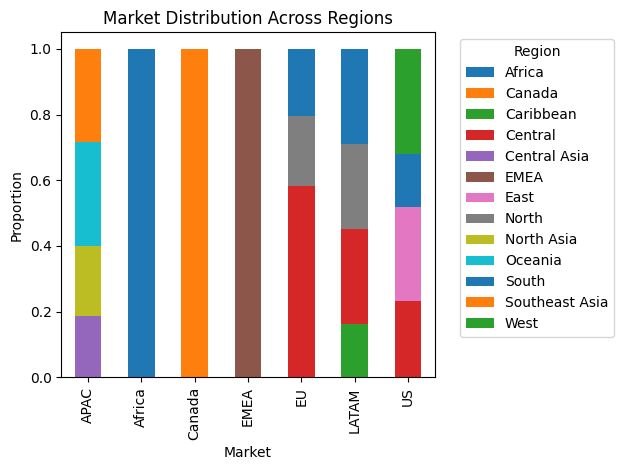


Q6 ii: Office Supply Orders by Country
Office supply orders by country:
Country
United States    6026
France           1854
Australia        1608
Mexico           1492
Germany          1348
                 ... 
Tajikistan          2
Armenia             1
Swaziland           1
Eritrea             1
Bahrain             1
Name: count, Length: 145, dtype: int64

Negligible office supply orders: Morocco (311 orders, 1.0%)

Q6 iii: Most Useful Insights

Additional Market Analysis:

Profit by Market:
             mean    median           sum
Market                                   
APAC    39.629163  10.88625  436000.04900
Africa  19.374674   7.56000   88871.63100
Canada  46.399453  12.34500   17817.39000
EMEA     8.728966   5.04000   43897.97100
EU      37.282974  14.22000  372829.74150
LATAM   21.531328   8.00000  221643.48708
US      28.656896   8.66650  286397.02170


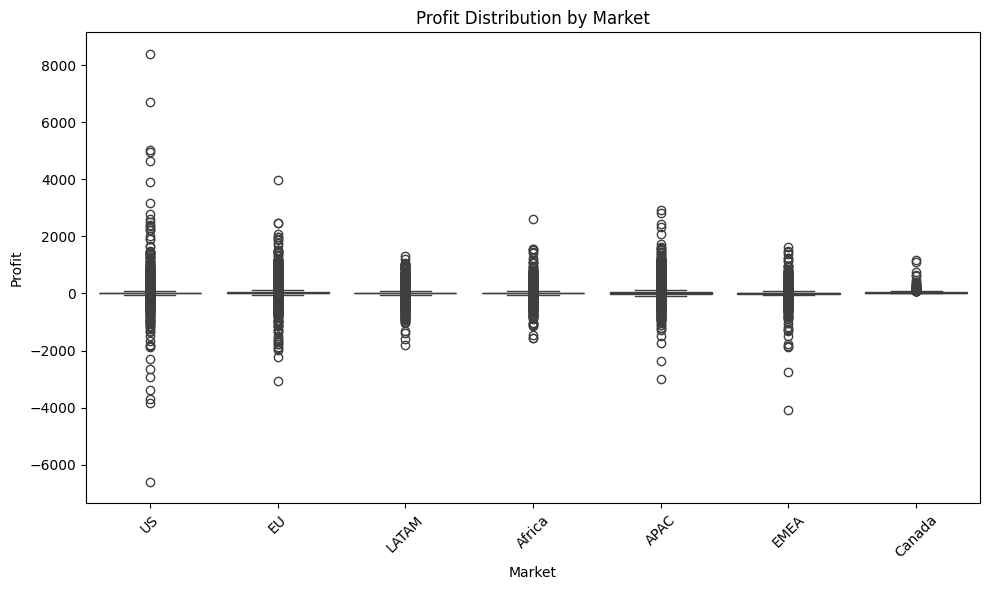


Sales by Market:
              mean  median      sum
Market                             
APAC    325.925559   123.0  3585833
Africa  170.868978    52.0   783776
Canada  174.302083    60.0    66932
EMEA    160.307019    52.0   806184
EU      293.813900   119.0  2938139
LATAM   210.286283    80.0  2164687
US      229.873324    54.5  2297354

Profit by Region (sorted by total profit):
                     mean   median           sum
Region                                          
Central         28.011512   9.7800  311403.98164
North           40.668329  12.4000  194597.95252
North Asia      70.820539  24.2400  165578.42100
South           21.122011   9.1580  140355.76618
Central Asia    64.687591  21.6300  132480.18700
Oceania         34.439091   8.7660  120089.11200
West            33.849032  11.1664  108418.44890
East            32.135808   8.1717   91522.78000
Africa          19.374674   7.5600   88871.63100
EMEA             8.728966   5.0400   43897.97100
Caribbean       20.456403 

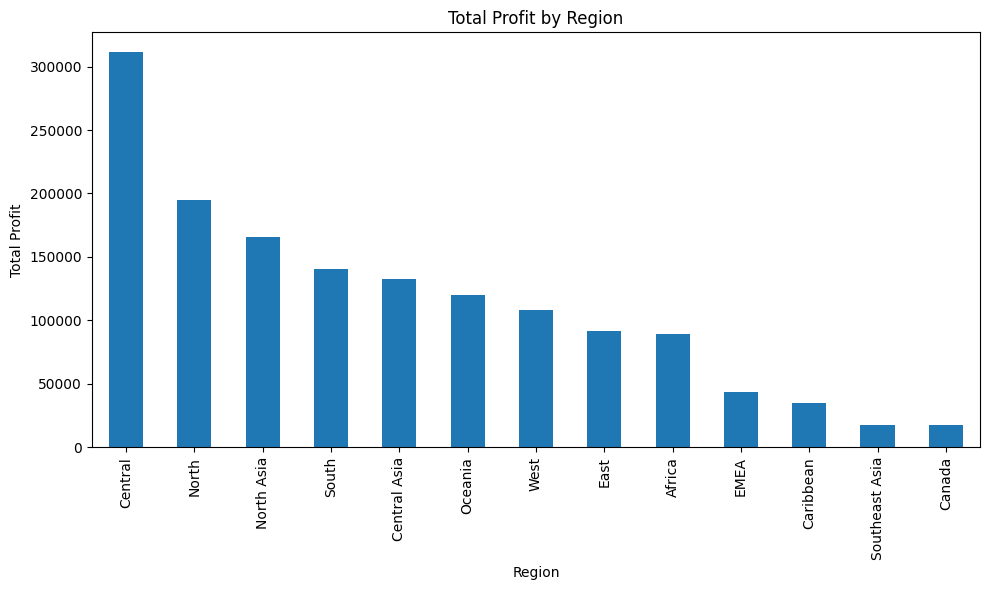

In [15]:
print("="*50)
print("Q6: BIVARIATE ANALYSIS - MARKET FEATURES")
print("="*50, '\n')


print("\nQ6 i: Market Distribution Across Regions")
market_region_cross = pd.crosstab(df['Market'], df['Region'], normalize='index')
print("Market distribution by Region (row percentages):")
print(market_region_cross.round(3))

plt.figure(figsize=(12, 6))
market_region_cross.plot(kind='bar', stacked=True)
plt.title('Market Distribution Across Regions')
plt.xlabel('Market')
plt.ylabel('Proportion')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


print("\nQ6 ii: Office Supply Orders by Country")
office_supplies_by_country = df[df['Category'] == 'Office Supplies']['Country'].value_counts()
print("Office supply orders by country:")
print(office_supplies_by_country)


total_orders = len(df[df['Category'] == 'Office Supplies'])
negligible_threshold = 0.01  # 1%

for country, count in office_supplies_by_country.items():
    proportion = count / total_orders
    if proportion < negligible_threshold:
        print(f"\nNegligible office supply orders: {country} ({count} orders, {proportion:.1%})")
        break

print("\nQ6 iii: Most Useful Insights")


print("\nAdditional Market Analysis:")

market_profit = df.groupby('Market')['Profit'].agg(['mean', 'median', 'sum'])
print("\nProfit by Market:")
print(market_profit)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Market', y='Profit')
plt.title('Profit Distribution by Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

market_sales = df.groupby('Market')['Sales'].agg(['mean', 'median', 'sum'])
print("\nSales by Market:")
print(market_sales)

region_profit = df.groupby('Region')['Profit'].agg(['mean', 'median', 'sum']).sort_values('sum', ascending=False)
print("\nProfit by Region (sorted by total profit):")
print(region_profit)

plt.figure(figsize=(10, 6))
region_profit['sum'].plot(kind='bar')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

print("="*50, '\n')